## Implement Linear Regression - On Customer Sales Data

We will try to apply `linear regression model` on Customer Sales Data, to `predict Annual amount spent` by a customer.
#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
#Importing required numpy, pandas, scikit-learn, matplotlib and seaborn libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing `csv` file, NOT stored in same directory as `ipynb` file but in a sub directory `data`**

In [4]:
customers = pd.read_csv('online_sales.csv')

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Annual Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


 Using info() we find that there are 500 rows and 8 columns.

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Annual Amount Spent
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,33.053340,12.052620,37.060480,3.53336,499.314240
std,0.992513,0.994418,1.010555,0.99926,79.314764
min,29.530000,8.510000,33.910000,0.27000,256.670000
25%,32.340000,11.390000,36.347500,2.93000,445.037500
50%,33.085000,11.980000,37.070000,3.53500,498.890000
75%,33.712500,12.752500,37.720000,4.13000,549.312500
max,36.140000,15.130000,40.010000,6.92000,765.520000


In [7]:
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Annual Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.50,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.93,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.55


In [8]:
customers.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Annual Amount Spent
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.65,11.50,38.33,4.96,551.62
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.32,12.39,36.84,2.34,456.47
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.72,12.42,35.77,2.74,497.78


In [9]:
# shuffle the DataFrame rows 
customers = customers.sample(frac = 1) 

In [10]:
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Annual Amount Spent
231,dominguezmaria@gmail.com,"1768 Rosales Ford Apt. 793\nLake Markbury, SC ...",RoyalBlue,34.17,12.14,37.26,3.40,512.55
310,veronicapruitt@hotmail.com,Unit 7502 Box 8345\nDPO AE 53747,Cyan,33.25,11.66,36.55,3.36,479.61
33,joshuaodom@gmail.com,"5277 Patel Brook\nEast Audrey, NJ 19075",DarkGoldenRod,32.73,13.10,38.88,2.82,491.07


In [11]:
customers.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Annual Amount Spent
367,carolfarley@gmail.com,"51173 Curtis Cliff Apt. 727\nRamoston, DE 3271...",SlateBlue,32.99,10.44,35.94,2.90,407.66
88,rojasmichael@wagner-thomas.com,"7602 Scott Plaza Apt. 158\nLake Amberland, VI ...",DarkKhaki,31.96,12.83,36.95,4.57,547.13
281,greenelizabeth@edwards.com,"54051 Jenkins View\nEast Danielshire, IN 32905...",DarkViolet,33.80,11.62,38.42,4.56,560.44


### Using Seaborn Visualization (pairplot)
**`To find CORRELATION among columns with respect to annual amount spent.`**

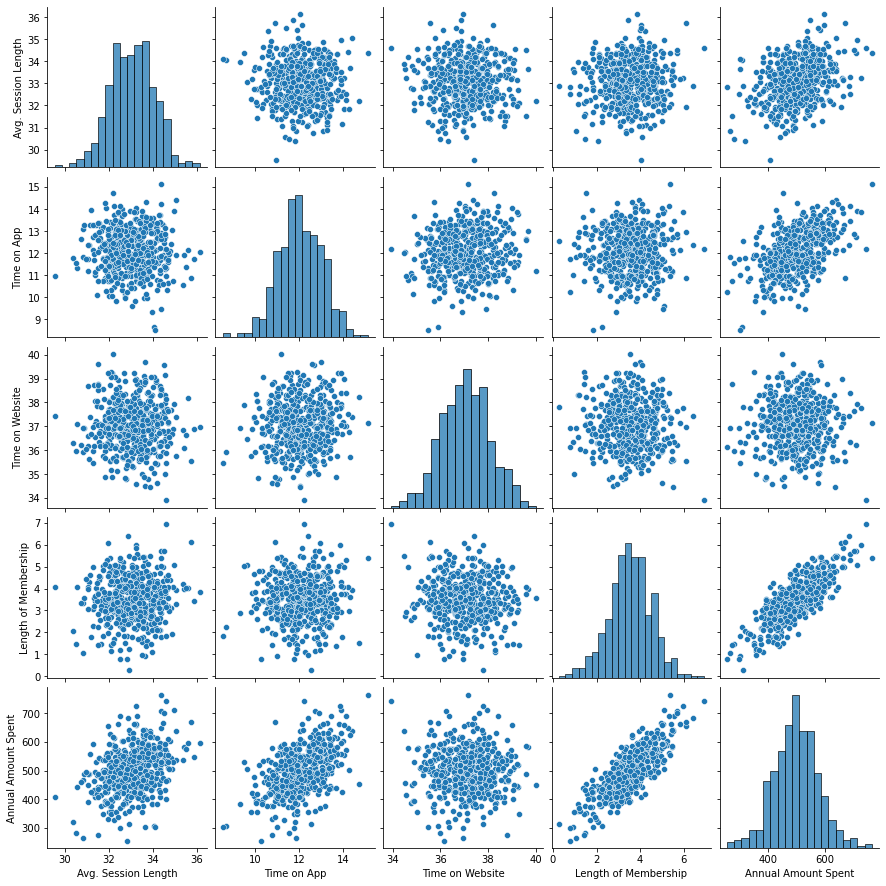

In [12]:
sns.pairplot(customers);

#### From the pair plots above, it is evident:
- That data distribution is normal.
- There is clear correlation between `length of membership` and `annual amount spent`.
- There is also correlation between `time on app` and `annual amount spent`.

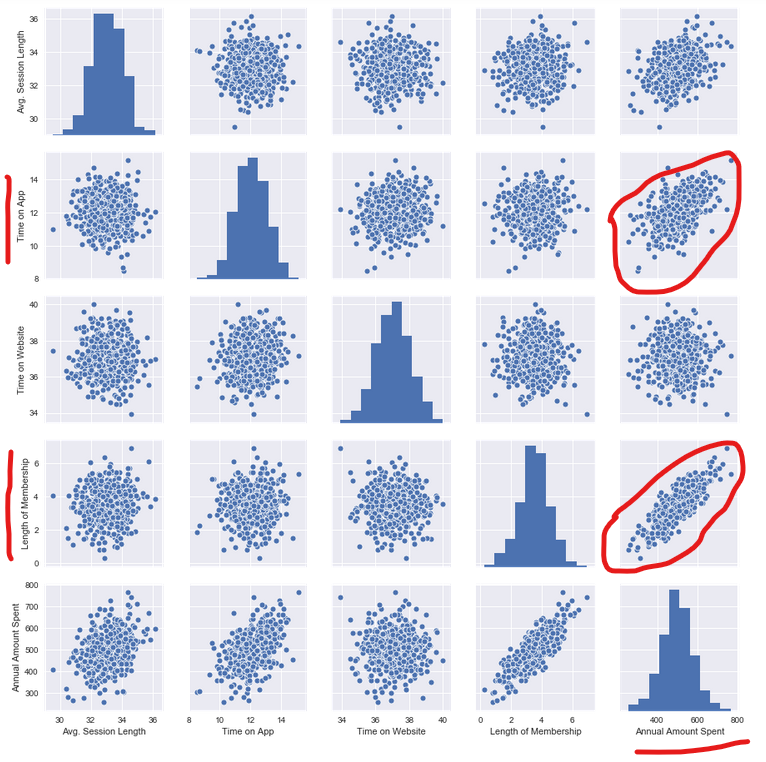

### Using Seaborn Visualization (heatmap)
`To find correlation among columns with respect to annual amount spent.`

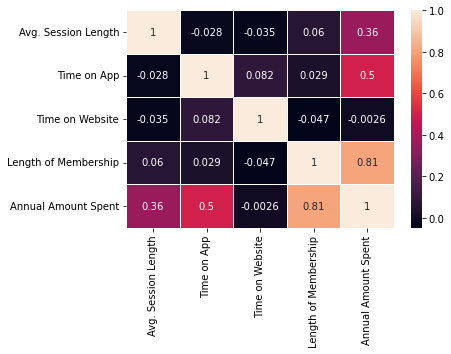

In [13]:
sns.heatmap(customers.corr(),linewidth=0.5, annot=True);

- Above heatmap confirms correlation between `'length of membership'` and `'Annual amount spent'`. 
- It is also evident that there is good degree of correlation between `'Annual amount spent'` and `'Time on app'`. 
- Also lesser degree of correlation with `'Avg. Session length'`

Along with `'Length of Membership'` and `'Time on App'`,there is one more variable<br> `(Avg. Session Length)` 
that could help in predicting dependent variable.<br><br> 
Let us focus on using `'Length of Membership'` and `'Time on App'` for now.<br>
We can revisit using `'Avg. Session Length'` later.

### Linear Regression Analysis
- Before we start Linear Regression Analysis, we need to `split dataset into training and test data`. 
- We will use `train data to fit our model` and `test data to test our model`. 
- It is a general practice to keep `30% as test data` and `70% as training data`.

In [14]:
# Independent variables(x) - 'Time on App' and 'Length of Membership'
x = customers[['Time on App', 'Length of Membership']]

# Dependent variables(y) - 'Yearly Amount Spent'
y = customers['Annual Amount Spent']

**Splitting dataset into train and test , giving 30% as test data and 70% as train data**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

**Using LinearRegression function from Scikit-Learn Library.**

In [16]:
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ",lm.intercept_)

#To retrieve the slope (m):
print(lm.coef_)

print("Coeffs - Time on App : ", lm.coef_[0])
print("Coeffs - Length of Membership : ", lm.coef_[1])

Intercept :  -173.9613638326889
[37.47937225 62.7663618 ]
Coeffs - Time on App :  37.47937224527653
Coeffs - Length of Membership :  62.76636179937193


## Validating the trained model

**Predicting Values of `y` based on 30% `x` test values.**

In [18]:
y_pred = lm.predict(x_test)

**Comparing Actual Values with Predicted Values by plotting graph.**

Text(0, 0.5, 'Predicted values')

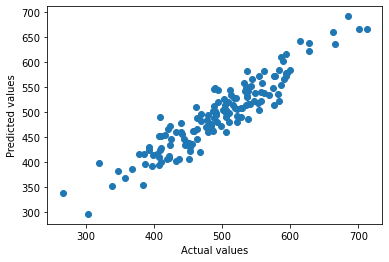

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

### How accurate is our Model ?

A common method of `measuring accuracy` of regression models is to use: `R2 score, Variance and Mean Square Error`.

In [20]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.8719781752228883
R2 score :  0.8718834080455491
MSE:  761.6646546808172


- Predicted values and actual values seem to be agreeing with each other and R2 score is 0.88 (Max possible is 1.0).
- But MSE seems to be higher.

- Now, let us add the third column `Avg. Session length` which we did not use earlier.
- If R2 score increases and MSE decreases.

In [21]:
x = customers[['Time on App', 'Length of Membership','Avg. Session Length']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

Splitting dataset into train and test , giving 30% as test data and 70% as train data

In [23]:
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ",lm.intercept_)

#To retrieve the slope (m):
print(lm.coef_)

print("Coeffs - Time on App : ", lm.coef_[0])
print("Coeffs - Length of Membership : ", lm.coef_[1])
print("Coeffs - Avg. Session Length : ", lm.coef_[2])

Intercept :  -1038.6261575700469
[38.69816753 61.2254599  25.88040895]
Coeffs - Time on App :  38.69816752543564
Coeffs - Length of Membership :  61.22545989556801
Coeffs - Avg. Session Length :  25.880408949713306


In [25]:
y_pred = lm.predict(x_test)

In [26]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.9826778141500898
R2 score :  0.9825706482873384
MSE:  103.61906253527758


Text(0, 0.5, 'Predicted values')

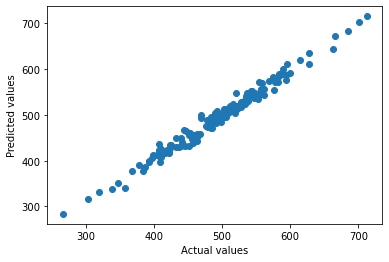

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

- After adding the third column, predicted vs actual values is giving a leaner graph, which is better. 
- Let us look further into R2 score and MSE.

In [28]:
print('R2 score : ',metrics.r2_score(y_test, y_pred))
print('Variance: ',metrics.explained_variance_score(y_test,y_pred))
print('MSE ', metrics.mean_squared_error(y_test,y_pred))

R2 score :  0.9825706482873384
Variance:  0.9826778141500898
MSE  103.61906253527758


Addition of third column `Avg. Session Length` greatly `improved the model` with `increased R2 score of 0.981 and reduced MSE of 118.68`.